<font size=20>Q1</font>  - Intensity Transformation

In [55]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Utility function to display images side-by-side
def show_images(img_list, title_list, cmap_list=None):
    n = len(img_list)
    plt.figure(figsize=(5*n, 5))
    for i, img in enumerate(img_list):
        plt.subplot(1, n, i+1)
        if cmap_list and cmap_list[i]:
            plt.imshow(img, cmap=cmap_list[i])
        else:
            plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(title_list[i])
        plt.axis('off')
    plt.show()


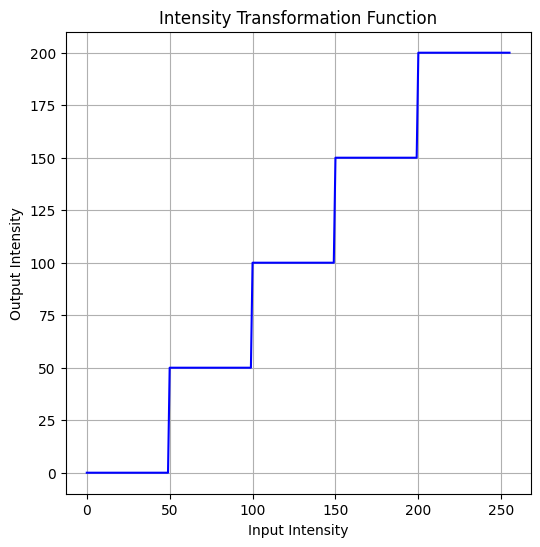

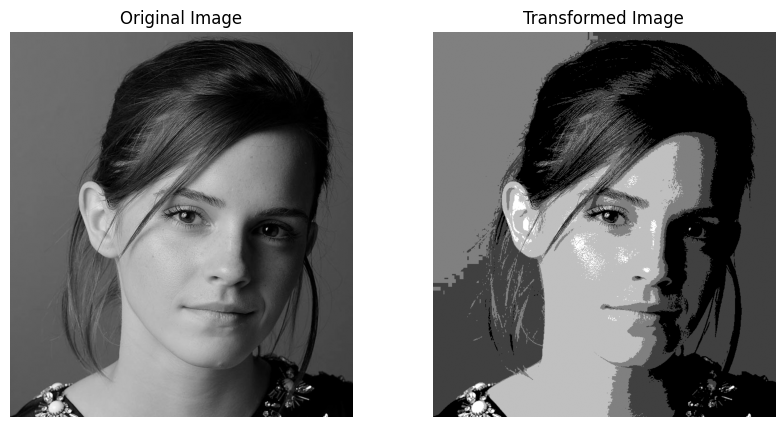

In [57]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
img1 = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
assert img1 is not None, "Image not found."

# Define intensity transformation
def intensity_transform(img):
    table = np.array([
        0   if i < 50 else
        50  if i < 100 else
        100 if i < 150 else
        150 if i < 200 else
        200
        for i in range(256)
    ], dtype=np.uint8)
    return cv.LUT(img, table)

# Apply transformation
img1_transformed = intensity_transform(img1)

# Plot transformation curve
plt.figure(figsize=(6,6))
plt.plot(range(256), [intensity_transform(np.array([[i]], dtype=np.uint8))[0,0] for i in range(256)], 'b-')
plt.title("Intensity Transformation Function")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)
plt.show()

# Show images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img1_transformed, cmap='gray')
plt.title("Transformed Image")
plt.axis('off')

plt.show()


<font size=20>Q2</font>  - Accentuate
 (a) white matter
 (b) gray matter

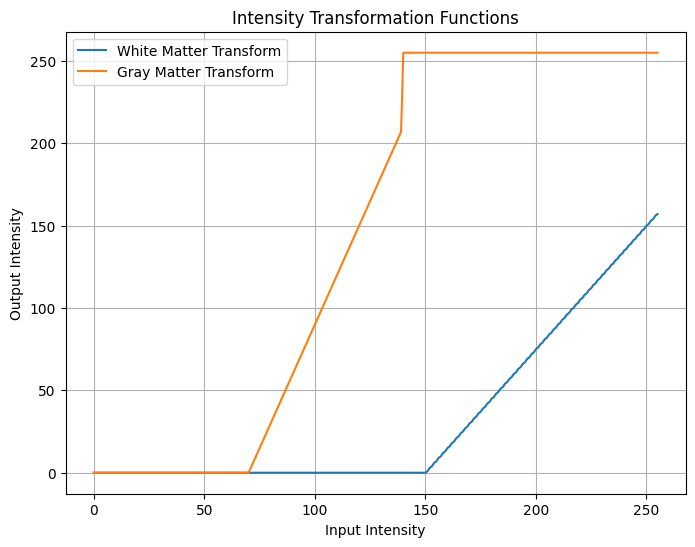

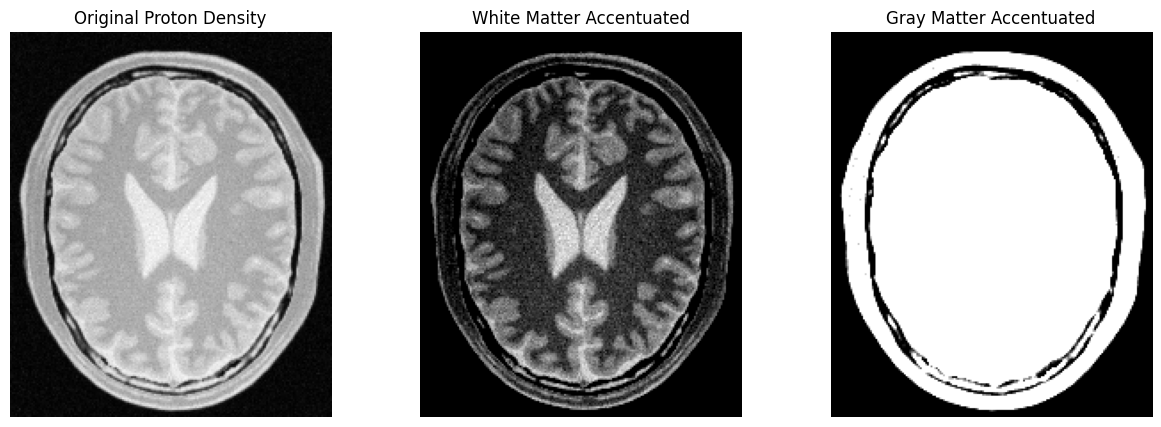

In [43]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image in grayscale
img2 = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img2 is not None, "Proton density image not found."

# Define intensity transformation to accentuate white matter (higher intensities)
def white_matter_transform(img):
    table = np.array([
        0 if i < 150 else min(255, int(1.5 * (i - 150))) for i in range(256)
    ], dtype=np.uint8)
    return cv.LUT(img, table)

# Define intensity transformation to accentuate gray matter (mid-range intensities)
def gray_matter_transform(img):
    table = np.array([
        0 if i < 70 else
        min(255, int(3 * (i - 70))) if i < 140 else
        255
        for i in range(256)
    ], dtype=np.uint8)
    return cv.LUT(img, table)

# Apply the transformations
img_white = white_matter_transform(img2)
img_gray = gray_matter_transform(img2)

# Plot intensity transformation functions
plt.figure(figsize=(8,6))
x = np.arange(256)
plt.plot(x, [white_matter_transform(np.array([[i]], dtype=np.uint8))[0,0] for i in x], label='White Matter Transform')
plt.plot(x, [gray_matter_transform(np.array([[i]], dtype=np.uint8))[0,0] for i in x], label='Gray Matter Transform')
plt.title('Intensity Transformation Functions')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.legend()
plt.grid(True)
plt.show()

# Show original and transformed images
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img2, cmap='gray')
plt.title('Original Proton Density')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_white, cmap='gray')
plt.title('White Matter Accentuated')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_gray, cmap='gray')
plt.title('Gray Matter Accentuated')
plt.axis('off')

plt.show()


<font size=20>Q3</font>  -  gamma correction and histrogram 

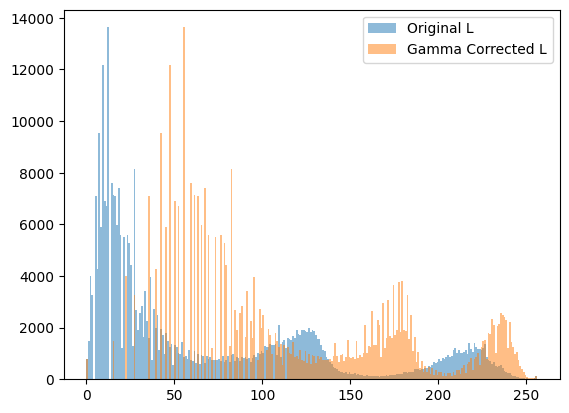

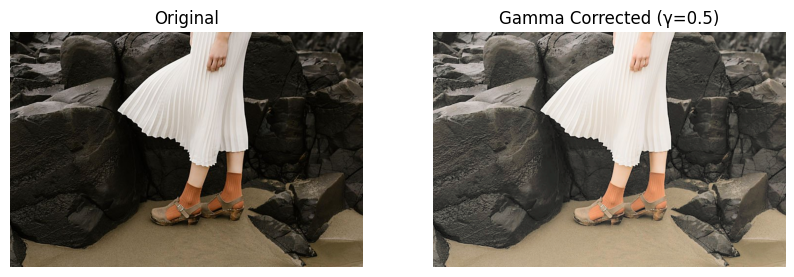

In [44]:
img3 = cv.imread("highlights_and_shadows.jpg")
lab = cv.cvtColor(img3, cv.COLOR_BGR2LAB)
L, a, b = cv.split(lab)

gamma = 0.5
L_norm = L / 255.0
L_corrected = np.power(L_norm, gamma) * 255
L_corrected = np.uint8(np.clip(L_corrected, 0, 255))

lab_corrected = cv.merge((L_corrected, a, b))
img3_corrected = cv.cvtColor(lab_corrected, cv.COLOR_LAB2BGR)

# Histograms
plt.hist(L.ravel(), bins=256, range=[0,256], alpha=0.5, label='Original L')
plt.hist(L_corrected.ravel(), bins=256, range=[0,256], alpha=0.5, label='Gamma Corrected L')
plt.legend()
plt.show()

show_images([img3, img3_corrected], ["Original", f"Gamma Corrected (γ={gamma})"])

<font size=20>Q4</font> 

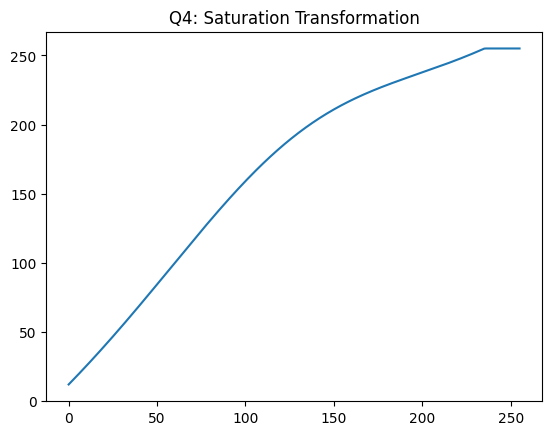

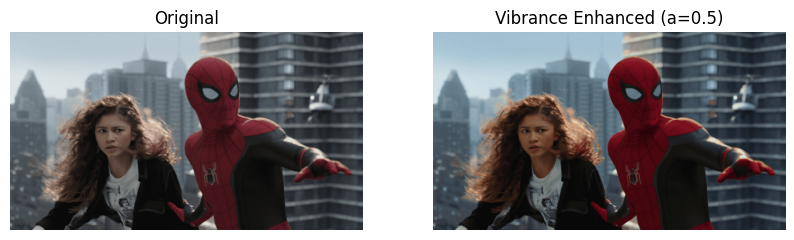

In [45]:
img4 = cv.imread('spider.png')
hsv = cv.cvtColor(img4, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)

a_val = 0.5
sigma = 70
x = np.arange(256)
s_transform = np.minimum(x + a_val * 128 * np.exp(-((x-128)**2)/(2*sigma**2)), 255)
s_enhanced = cv.LUT(s, np.uint8(s_transform))

hsv_enhanced = cv.merge((h, s_enhanced, v))
img4_enhanced = cv.cvtColor(hsv_enhanced, cv.COLOR_HSV2BGR)

plt.plot(x, s_transform)
plt.title("Q4: Saturation Transformation")
plt.show()

show_images([img4, img4_enhanced], ["Original", f"Vibrance Enhanced (a={a_val})"])


<font size=20>Q5</font>  - My own histrogram equalization

C:\Users\RAVINDU MALSHAN\AppData\Local\Temp\ipykernel_22608\2415295409.py:12: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img5.ravel(), 256, [0,256], label='Original')
C:\Users\RAVINDU MALSHAN\AppData\Local\Temp\ipykernel_22608\2415295409.py:13: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img5_eq.ravel(), 256, [0,256], label='Equalized')


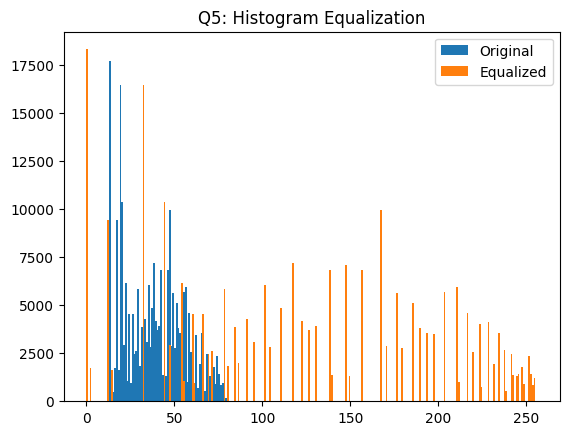

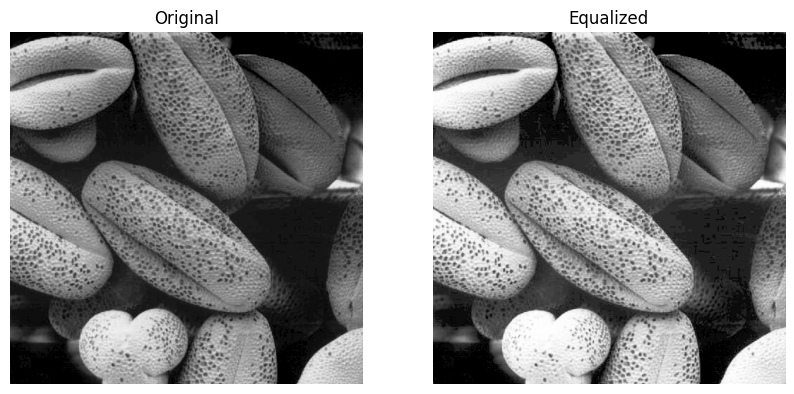

In [46]:
def hist_equalize_gray(img):
    hist, _ = np.histogram(img.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_masked = np.ma.masked_equal(cdf, 0)
    cdf_masked = (cdf_masked - cdf_masked.min()) * 255 / (cdf_masked.max() - cdf_masked.min())
    cdf_final = np.ma.filled(cdf_masked, 0).astype('uint8')
    return cv.LUT(img, cdf_final)

img5 = cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)
img5_eq = hist_equalize_gray(img5)

plt.hist(img5.ravel(), 256, [0,256], label='Original')
plt.hist(img5_eq.ravel(), 256, [0,256], label='Equalized')
plt.legend(); plt.title("Q5: Histogram Equalization")
plt.show()

show_images([img5, img5_eq], ["Original", "Equalized"], ["gray", "gray"])


<font size=20>Q6</font> -  apply histogram equalization only to the foreground of an image

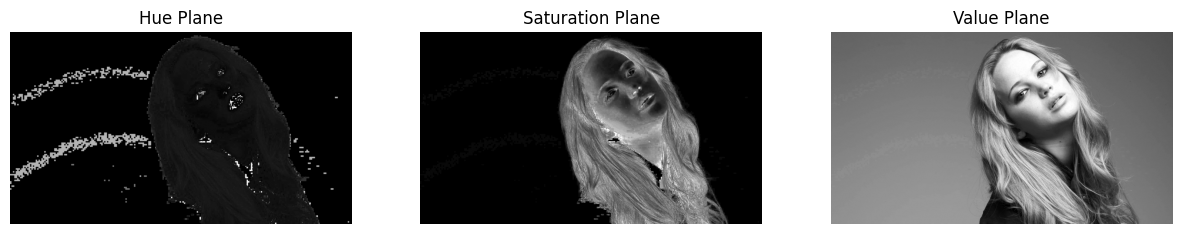

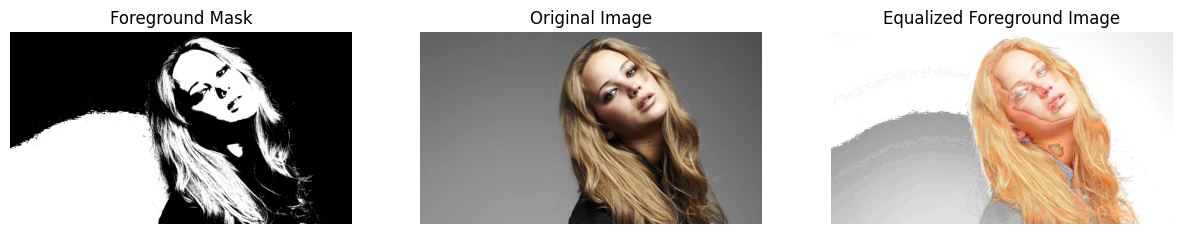

In [47]:
# --- Histogram equalization for grayscale (manual with cumsum) ---
def hist_equalize_gray_manual(gray_img):
    hist, _ = np.histogram(gray_img.flatten(), bins=256, range=[0,256])
    cdf = np.cumsum(hist)                           # cumulative distribution
    cdf_normalized = cdf * 255 / cdf[-1]            # normalize to [0,255]
    cdf_normalized = cdf_normalized.astype(np.uint8)
    equalized = cdf_normalized[gray_img]
    return equalized

# Load image and split into HSV
img6 = cv.imread('jeniffer.jpg')
hsv6 = cv.cvtColor(img6, cv.COLOR_BGR2HSV)
h6, s6, v6 = cv.split(hsv6)

# (a) — Display the H, S, V planes
show_images([h6, s6, v6],
            ["Hue Plane", "Saturation Plane", "Value Plane"],
            ["gray", "gray", "gray"])

# (b) — Threshold (choose the plane; here  used V)
_, mask = cv.threshold(v6, 128, 255, cv.THRESH_BINARY)

# (c) — Foreground extraction
foreground = cv.bitwise_and(v6, v6, mask=mask)

# (d) — Compute histogram and cumulative sum (for demonstration)
hist, _ = np.histogram(foreground[mask > 0], bins=256, range=[0,256])
cdf = np.cumsum(hist)

# (e) — Histogram equalization of the foreground
foreground_eq = hist_equalize_gray_manual(foreground)

# (f) — Extract background and combine
background = cv.bitwise_and(v6, v6, mask=cv.bitwise_not(mask))
combined_v = cv.add(background, foreground_eq)

# Merge back into HSV and convert to BGR
final_img6 = cv.cvtColor(cv.merge((h6, s6, combined_v)), cv.COLOR_HSV2BGR)

# Display required outputs
show_images(
    [mask, img6, final_img6],
    ["Foreground Mask", "Original Image", "Equalized Foreground Image"],
    ["gray", None, None]
)

<font size=20>Q7</font> - Filtering with the Sobel operator 

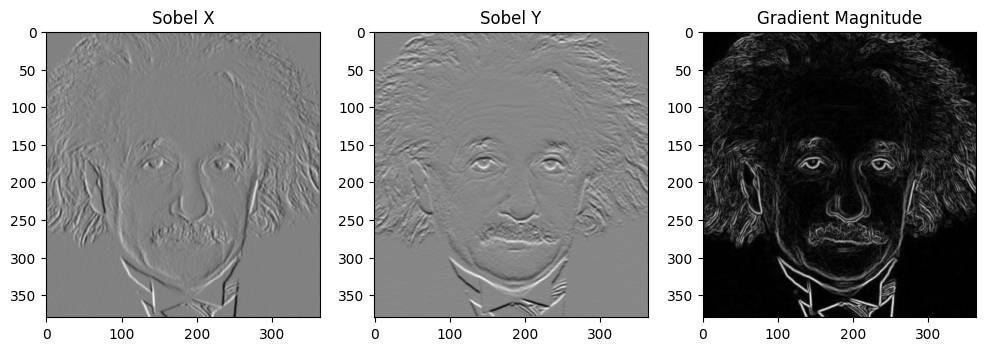

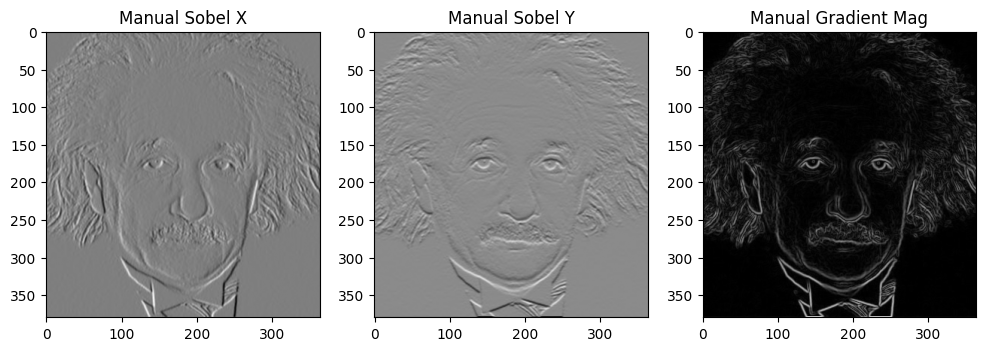

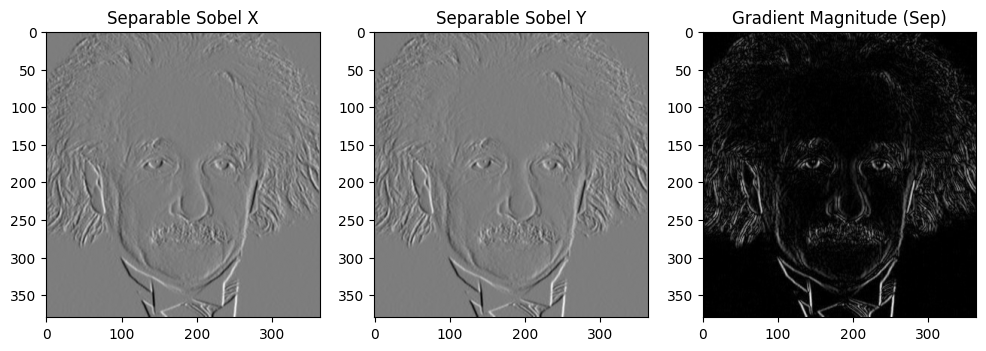

In [48]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
img = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "Image not found"

# Sobel kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1],
                    [0,  0,  0],
                    [1,  2,  1]], dtype=np.float32)

# Apply Sobel using filter2D
grad_x = cv.filter2D(img, cv.CV_64F, sobel_x)
grad_y = cv.filter2D(img, cv.CV_64F, sobel_y)

# Gradient magnitude
grad_mag = cv.magnitude(grad_x, grad_y)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(grad_x, cmap='gray'); plt.title("Sobel X")
plt.subplot(1, 3, 2); plt.imshow(grad_y, cmap='gray'); plt.title("Sobel Y")
plt.subplot(1, 3, 3); plt.imshow(grad_mag, cmap='gray'); plt.title("Gradient Magnitude")
plt.show()


def sobel_filter_manual(img, kernel):
    h, w = img.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2
    
    # Zero padding
    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    output = np.zeros_like(img, dtype=np.float32)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)
    
    return output

# Apply manual Sobel
grad_x_manual = sobel_filter_manual(img, sobel_x)
grad_y_manual = sobel_filter_manual(img, sobel_y)
grad_mag_manual = np.sqrt(grad_x_manual**2 + grad_y_manual**2)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(grad_x_manual, cmap='gray'); plt.title("Manual Sobel X")
plt.subplot(1, 3, 2); plt.imshow(grad_y_manual, cmap='gray'); plt.title("Manual Sobel Y")
plt.subplot(1, 3, 3); plt.imshow(grad_mag_manual, cmap='gray'); plt.title("Manual Gradient Mag")
plt.show()

# Separable kernels
g_col = np.array([[1], [2], [1]], dtype=np.float32)  # vertical
g_row = np.array([[1, 0, -1]], dtype=np.float32)     # horizontal

# First convolve with g_row, then g_col
temp = cv.filter2D(img, cv.CV_32F, g_row)    # horizontal filtering
sobel_sep_x = cv.filter2D(temp, cv.CV_32F, g_col)  # vertical filtering

# Similarly for Y direction (swap order)
temp = cv.filter2D(img, cv.CV_32F, g_col)    
sobel_sep_y = cv.filter2D(temp, cv.CV_32F, g_row)

grad_mag_sep = cv.magnitude(sobel_sep_x, sobel_sep_y)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(sobel_sep_x, cmap='gray'); plt.title("Separable Sobel X")
plt.subplot(1, 3, 2); plt.imshow(sobel_sep_y, cmap='gray'); plt.title("Separable Sobel Y")
plt.subplot(1, 3, 3); plt.imshow(grad_mag_sep, cmap='gray'); plt.title("Gradient Magnitude (Sep)")
plt.show()


Q8

Results for im01small.png vs im01.png:
  Normalized SSD (Nearest Neighbor): 255.295658
  Normalized SSD (Bilinear)       : 115.091852



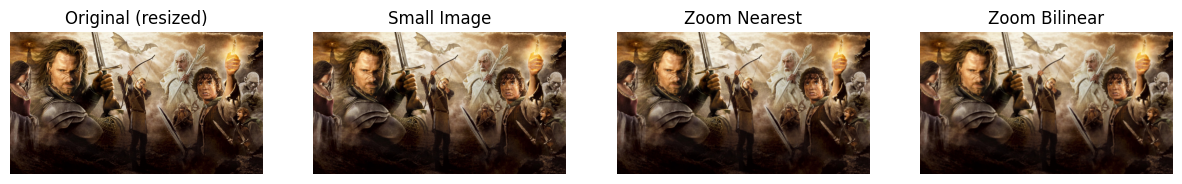

Results for im02small.png vs im02.png:
  Normalized SSD (Nearest Neighbor): 64.629356
  Normalized SSD (Bilinear)       : 18.345911



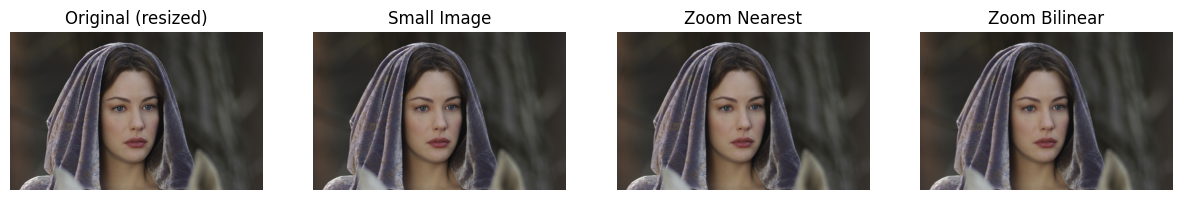

Results for im03small.png vs im03.png:
  Normalized SSD (Nearest Neighbor): 144.472292
  Normalized SSD (Bilinear)       : 46.318877



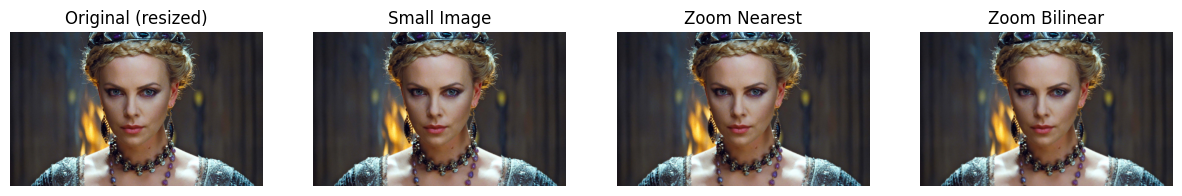

Results for taylor_small.jpg vs taylor.jpg:
  Normalized SSD (Nearest Neighbor): 239.968170
  Normalized SSD (Bilinear)       : 147.956726



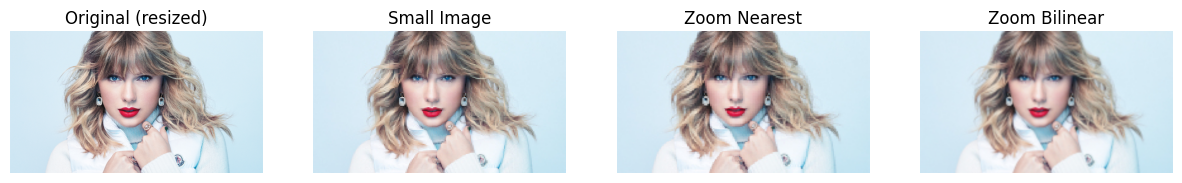

Results for taylor_very_small.jpg vs taylor.jpg:
  Normalized SSD (Nearest Neighbor): 676.081190
  Normalized SSD (Bilinear)       : 452.316280



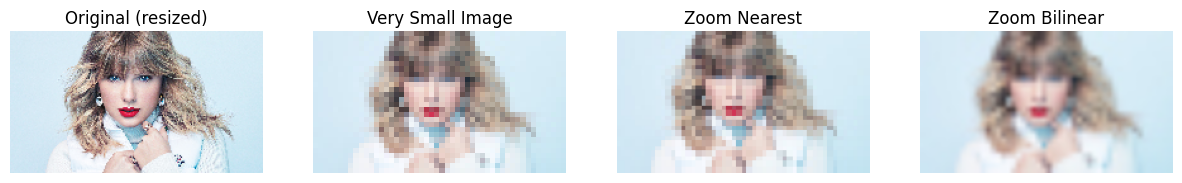

In [49]:

def zoom_nearest(img, scale):
    h, w = img.shape[:2]
    new_h, new_w = int(h * scale), int(w * scale)
    if img.ndim == 3:
        zoomed = np.zeros((new_h, new_w, img.shape[2]), dtype=img.dtype)
    else:
        zoomed = np.zeros((new_h, new_w), dtype=img.dtype)
    for y in range(new_h):
        for x in range(new_w):
            src_x = int(round(x / scale))
            src_y = int(round(y / scale))
            src_x = min(src_x, w - 1)
            src_y = min(src_y, h - 1)
            zoomed[y, x] = img[src_y, src_x]
    return zoomed

def normalized_ssd(img1, img2):
    diff = img1.astype(np.float32) - img2.astype(np.float32)
    ssd = np.sum(diff ** 2)
    return ssd / diff.size

def show_images(images, titles):
    n = len(images)
    plt.figure(figsize=(15,5))
    for i in range(n):
        plt.subplot(1, n, i+1)
        if images[i].ndim == 3:
            img = cv.cvtColor(images[i], cv.COLOR_BGR2RGB)
            plt.imshow(img)
        else:
            plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

factor = 4
image_folder = "."

image_pairs = [
    ("im01.png", "im01small.png"),
    ("im02.png", "im02small.png"),
    ("im03.png", "im03small.png"),
    ("taylor.jpg", "taylor_small.jpg"),
    ("taylor.jpg", "taylor_very_small.jpg")
]

for original_name, small_name in image_pairs:
    original_path = os.path.join(image_folder, original_name)
    small_path = os.path.join(image_folder, small_name)
    
    original = cv.imread(original_path)
    small = cv.imread(small_path)
    
    if original is None:
        print(f"Failed to load original image: {original_name}")
        continue
    if small is None:
        print(f"Failed to load small image: {small_name}")
        continue
    
    up_nearest = zoom_nearest(small, factor)
    up_bilinear = cv.resize(small, None, fx=factor, fy=factor, interpolation=cv.INTER_LINEAR)
    
    if original.shape != up_nearest.shape:
        original_resized = cv.resize(original, (up_nearest.shape[1], up_nearest.shape[0]))
    else:
        original_resized = original
    
    ssd_nearest = normalized_ssd(original_resized, up_nearest)
    ssd_bilinear = normalized_ssd(original_resized, up_bilinear)
    
    print(f"Results for {small_name} vs {original_name}:")
    print(f"  Normalized SSD (Nearest Neighbor): {ssd_nearest:.6f}")
    print(f"  Normalized SSD (Bilinear)       : {ssd_bilinear:.6f}\n")
    
    if small_name == "taylor_very_small.jpg":
        small_title = "Very Small Image"
    else:
        small_title = "Small Image"
    
    show_images(
        [original_resized, small, up_nearest, up_bilinear],
        ["Original (resized)", small_title, "Zoom Nearest", "Zoom Bilinear"]
    )


<font size=20>Q9</font>

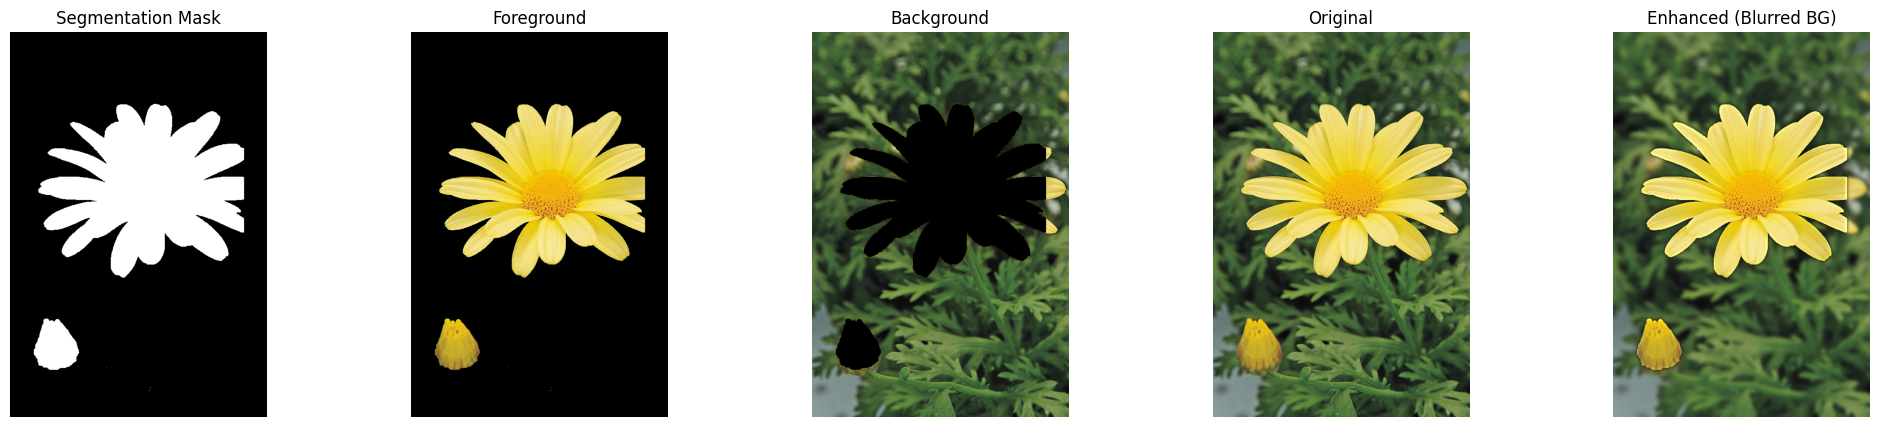

 Why is the background just beyond the edge of the flower quite dark in the enhanced image?

(c) The background just beyond the flower's edge appears dark in the enhanced image because GrabCut sometimes labels near-edge pixels as background due to uncertain 
classification (transition region). These pixels get replaced with the blurred background, which often has a lower average intensity, making them look darker.



In [58]:
# (a) GrabCut Segmentation
img9 = cv.imread("daisy.jpg")
mask = np.zeros(img9.shape[:2], np.uint8)
rect = (50, 50, img9.shape[1] - 100, img9.shape[0] - 100)  # rectangle around the flower

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

cv.grabCut(img9, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

# Create binary segmentation mask
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Foreground & background extraction
fg = img9 * mask2[:, :, np.newaxis]
bg = img9 * (1 - mask2[:, :, np.newaxis])

# (b) Blur background & combine
bg_blurred = cv.GaussianBlur(bg, (21, 21), 0)
enhanced_img = cv.add(fg, bg_blurred)

# Display results
show_images(
    [mask2 * 255, fg, bg, img9, enhanced_img],
    ["Segmentation Mask", "Foreground", "Background", "Original", "Enhanced (Blurred BG)"],
    ["gray", None, None, None, None]
)

#(c) Explanation
print(" Why is the background just beyond the edge of the flower quite dark in the enhanced image?") 
print("""
(c) The background just beyond the flower's edge appears dark in the enhanced image because GrabCut sometimes labels near-edge pixels as background due to uncertain 
classification (transition region). These pixels get replaced with the blurred background, which often has a lower average intensity, making them look darker.
""")